In [1]:
import pandas as pd
import requests
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap

In [2]:
pd.__version__

'2.0.2'

In [3]:
gis = GIS("https://utoronto.maps.arcgis.com",client_id="qLFzL7gUvDNNZCwi")
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://utoronto.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=qLFzL7gUvDNNZCwi&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=iaUdXRfLRdInk8VcN3zOajEUgukUMR&allow_verification=false
Enter code obtained on signing in using SAML: ········


C:\Users\Rutuja Gujare\anaconda3\envs\arcgis_env\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'utoronto.maps.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Successfully logged in as: gujareru_utoronto


GIS Server Connection

In [18]:
#connection function to a GIS server
def GIS_connection(gis):
    try:
        if gis.properties:
            print(f"Successfully logged in as: {gis.properties.user.username}")
            return True
    except Exception:
        print("GIS server connection not active.")
    return False

gis_server = GIS_connection(gis)
if gis_server:
    print("GIS server connection: Active")
else:
    print("GIS server connection: Not Active")

Successfully logged in as: gujareru_utoronto
GIS server connection: Active


<Item title:"Coronavirus COVID-19 (2019-nCoV)" type:Dashboard owner:CSSE_covid19>
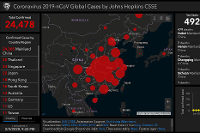

<Item title:"COVID-19 Cases US" type:Feature Layer Collection owner:CSSE_covid19>
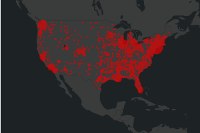

<Item title:"Dashboard Coronavirus COVID-19 (Mobile)" type:Dashboard owner:CSSE_covid19>
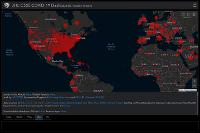

<Item title:"Coronavirus COVID-19 Cases V2" type:Feature Layer Collection owner:CSSE_covid19>
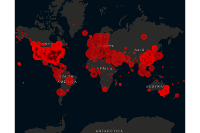

<Item title:"Coronavirus COVID-19 Cases" type:Feature Layer Collection owner:CSSE_covid19>
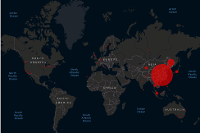

<Item title:"Coronavirus COVID-19 (2019-nCoV)" type:Dashboard owner:CSSE_covid19>
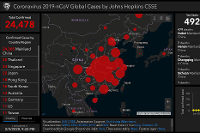

In [5]:
#getting data for covid
def data_lists(data_link):
    try:
        items = gis.content.search(data_link, outside_org=True)
        for item in items:
            display(item)
    except Exception:
        print("No dataset available for this link: Invalid link")

def load_covid_data(data_link):
    data = gis.content.search(data_link, outside_org=True)[0]
    return data

covid_data_list = data_lists("Coronavirus_2019_nCoV_Cases owner:CSSE_covid19")
covid_data_list

covid_data = load_covid_data("Coronavirus_2019_nCoV_Cases owner:CSSE_covid19")
covid_data


In [19]:
italy_map = gis.map('Italy',7)
italy_map

MapView(layout=Layout(height='400px', width='100%'))

In [20]:
italy_map.zoom
italy_map.rotation =17.5
italy_map

MapView(layout=Layout(height='400px', width='100%'))

In [21]:
#curating data for analysis-loading, cleaning, enhancing, processing
source_url = "https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1"
fl = FeatureLayer(url=source_url)

df_global = fl.query(where="1=1",
                     return_geometry=True,
                     as_df=True)

df_global.head()

C:\Users\Rutuja Gujare\anaconda3\envs\arcgis_env\lib\site-packages\arcgis\features\layer.py:3782: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[fld] = pd.to_datetime(
C:\Users\Rutuja Gujare\anaconda3\envs\arcgis_env\lib\site-packages\arcgis\features\layer.py:2310: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[fld] = pd.to_datetime(


,OBJECTID,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Recovered,Deaths,Active,Admin2,FIPS,Combined_Key,SHAPE
0,1,<NA>,Afghanistan,2022-09-11 05:20:45,33.93911,67.709953,195631,0,7787,0,<NA>,<NA>,Afghanistan,"{""x"": 67.70995300000004, ""y"": 33.9391100000000..."
1,2,<NA>,Albania,2022-09-11 05:20:45,41.1533,20.1683,330948,0,3584,0,<NA>,<NA>,Albania,"{""x"": 20.168300000000045, ""y"": 41.153300000000..."
2,3,<NA>,Algeria,2022-09-11 05:20:45,28.0339,1.6596,270532,0,6879,0,<NA>,<NA>,Algeria,"{""x"": 1.6596000000000686, ""y"": 28.033900000000..."
3,4,<NA>,Andorra,2022-09-11 05:20:45,42.5063,1.5218,46113,0,155,0,<NA>,<NA>,Andorra,"{""x"": 1.5218000000000416, ""y"": 42.506300000000..."
4,5,<NA>,Angola,2022-09-11 05:20:45,-11.2027,17.8739,103131,0,1917,0,<NA>,<NA>,Angola,"{""x"": 17.87390000000005, ""y"": -11.202699999999..."


In [9]:
#curating data for analysis-loading, cleaning, enhancing, processing

def get_country_data(country):
    country_cases = fl.query(where=f"Country_Region='{country.upper()}'")
    return country_cases

def filter_data(data):
    df = data.sdf[['Province_State', 'Confirmed','Active', 'Recovered', 'Deaths']]
    return df

def drop_null_cols(df):
    df = df.drop(columns=[col for col in df.columns if all(df[col] == 0) or all(df[col].isnull())])
    return df

def normalize_data(df, col):
    min_value = df[col].max()
    max_value = df[col].min()
    normalised_data = (df[col] - min_value) / (max_value - min_value)
    return normalised_data

country_data = get_country_data("Italy")
df = filter_data(country_data)
dataf = drop_null_cols(df)
datafc = dataf.copy(deep=True)

datafc['Deaths'], datafc['Confirmed'] = normalize_data(datafc,"Deaths"), normalize_data(datafc,"Confirmed")
datafc

C:\Users\Rutuja Gujare\anaconda3\envs\arcgis_env\lib\site-packages\arcgis\features\geo\_io\serviceops.py:119: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[fld] = pd.to_datetime(


,Province_State,Confirmed,Deaths
0,Abruzzo,0.854746,0.925763
1,Basilicata,0.960377,0.98962
2,Calabria,0.854603,0.942002
3,Campania,0.376226,0.746365
4,Emilia-Romagna,0.481587,0.583852
5,Friuli Venezia Giulia,0.873724,0.884148
6,Lazio,0.424164,0.725222
7,Liguria,0.849176,0.880154
8,Lombardia,-0.0,-0.0
9,Marche,0.83629,0.91512


In [22]:
#getting geographical data from living atlas
country_id = gis.content.get('5ac0f7517c094f5284035508d0bf6059')
country_states = country_id.layers[2]
country_df = country_states.query(as_df = True)
country_df.columns

Index(['OBJECTID', 'ID', 'NAME', 'TOTPOP_CY', 'AREA', 'ISO_CODE', 'ISO_SUB',
       'ISO2_CC', 'ISO3_CC', 'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [23]:
#sorting geographical data, dropping duplicates and renaming cols 
tmp_df = country_df.sort_values('NAME', ascending=True)
italy_df = tmp_df.drop_duplicates(subset='NAME', keep='last')
italy_df = italy_df.rename(columns={'NAME': 'Province_State'})
italy_df.head()

,OBJECTID,ID,Province_State,TOTPOP_CY,AREA,ISO_CODE,ISO_SUB,ISO2_CC,ISO3_CC,Shape__Area,Shape__Length,SHAPE
12,13,13,Abruzzo,1276613,10796.82,IT65,65,IT,ITA,19704818419.192402,897220.678638,"{""rings"": [[[1560447.9378, 5113479.838], [1560..."
16,17,17,Basilicata,540954,9991.12,IT77,77,IT,ITA,17298193888.7188,886251.935848,"{""rings"": [[[1786568.8841, 4850666.9531], [178..."
17,18,18,Calabria,1848066,15078.1,IT78,78,IT,ITA,25052691476.8242,1209665.216332,"{""rings"": [[[1780872.2544, 4567531.5569], [178..."
14,15,15,Campania,5603449,13599.84,IT72,72,IT,ITA,23800765738.267101,1448653.05566,"{""rings"": [[[1718924.6115, 4867963.5021], [171..."
7,8,08,Emilia-Romagna,4447251,22504.91,IT45,45,IT,ITA,44282072060.260696,1791908.531911,"{""rings"": [[[1357500.2963, 5424050.1418], [135..."


Merge datasets

In [24]:
# Merge attribute data with geographical data
def merge_data(df1,df2,key,jointype):
    italy_merged_df = pd.merge(left = df1, right = df2, how=jointype, on = key)
    return italy_merged_df

italy_df = italy_df[['Province_State','SHAPE']]
merged_df = merge_data(italy_df,dataf,'Province_State','inner')
merged_df

,Province_State,SHAPE,Confirmed,Deaths
0,Abruzzo,"{""rings"": [[[1560447.9378, 5113479.838], [1560...",545691,3651
1,Basilicata,"{""rings"": [[[1786568.8841, 4850666.9531], [178...",180806,981
2,Calabria,"{""rings"": [[[1780872.2544, 4567531.5569], [178...",546184,2972
3,Campania,"{""rings"": [[[1718924.6115, 4867963.5021], [171...",2198658,11152
4,Emilia-Romagna,"{""rings"": [[[1357500.2963, 5424050.1418], [135...",1834705,17947
5,Lazio,"{""rings"": [[[1511174.1965, 5042487.5669], [151...",2033065,12036
6,Liguria,"{""rings"": [[[988194.134199999, 5528142.5911], ...",564932,5558
7,Lombardia,"{""rings"": [[[1033406.2433, 5571231.4939], [103...",3498268,42359
8,Marche,"{""rings"": [[[1490565.8987, 5264474.3927], [149...",609444,4096
9,Molise,"{""rings"": [[[1625602.8897, 5066175.1584], [162...",88465,675


Fatalities Map

In [25]:
#map1 using classed size render
map1 = gis.map("Italy",6)

def map_size_render(mapobj,feature_layer,feature_type,rend,field):
    try:
        mapobj.add_layer(feature_layer, 
                    { "type": "FeatureLayer",
                      "renderer":"ClassedColorRenderer",
                      "field_name":"Deaths"})
        mapobj.legend = True
    except:
        print("Check data : Error in mapping")
        
map_size_render(map1,fl,"FeatureLayer","ClassedColorRenderer","Deaths")   
map1


MapView(layout=Layout(height='400px', width='100%'), legend=True)

Confirmed cases Map

In [26]:
#map2 Choropleth Map
def map_choropleth(mapobj,feature_type, source_url,rend,field):
    try:
        mapobj.add_layer({
            "type": feature_type, 
            "url": source_url,
            "renderer": rend,
            "field_name": field,
        })
        mapobj.legend = True
    except:
        print("Check data : Error in mapping")
        
map2 = gis.map("Italy",6)
map_choropleth(map2,"FeatureLayer","https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1",
        "ClassedSizeRenderer","confirmed")
map2

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [15]:
pip install matplotlib-inline

Note: you may need to restart the kernel to use updated packages.


In [28]:
df['Total Cases'] = df['Confirmed']
df['Percentage Deaths'] = round(df['Deaths']/df['Total Cases'],3)
df

,Province_State,Confirmed,Active,Recovered,Deaths,Total Cases,Percentage Deaths
0,Abruzzo,545691,0,0,3651,545691,0.007
1,Basilicata,180806,0,0,981,180806,0.005
2,Calabria,546184,0,0,2972,546184,0.005
3,Campania,2198658,0,0,11152,2198658,0.005
4,Emilia-Romagna,1834705,0,0,17947,1834705,0.01
5,Friuli Venezia Giulia,480136,0,0,5391,480136,0.011
6,Lazio,2033065,0,0,12036,2033065,0.006
7,Liguria,564932,0,0,5558,564932,0.01
8,Lombardia,3498268,0,0,42359,3498268,0.012
9,Marche,609444,0,0,4096,609444,0.007


Data visualization

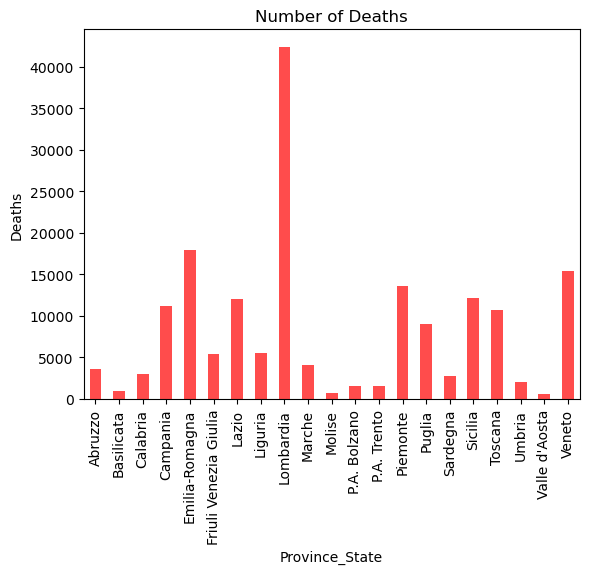

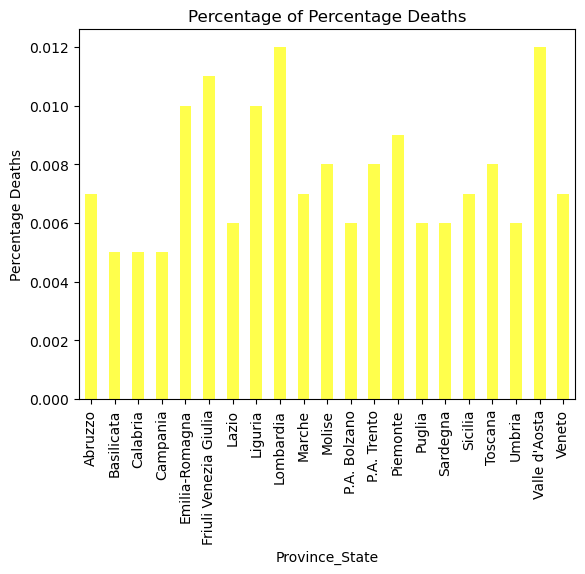

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

def bar_plots(df,col1,col2):
    try:
        bar1 = df.plot(x='Province_State', y=col1, kind='bar', legend=False, title=f'Number of {col1}', color='red', alpha=0.7)
        bar1.set_ylabel(col1)

        bar2 = df.plot(x='Province_State', y=col2, kind='bar', legend=False, title=f'Percentage of {col2}', color='yellow', alpha=0.7)
        bar2.set_ylabel(col2)
    except:
        print("Check data : Error in mapping")
    
bar_plots(df,'Deaths','Percentage Deaths')

In [ ]:
# 